In [45]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats as stats

%autoreload 2
%aimport AD_predictor_tools
%aimport AD_comparison_tools
%aimport PlottingTools
%aimport uniprotBedTools

In [47]:
SFARI_TFs = pd.read_csv("../data/SFARI_TFs.csv")
SFARI_TFs

,Unnamed: 0,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports,GeneName,ProteinSeq,uniprotID
0,0,9,ADNP,Activity-dependent neuroprotector homeobox,ENSG00000101126,20,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,41.50,64,sp|Q9H2P0|ADNP_HUMAN,MFQLPVNNLGSLRKARKTVKKILSDIGLEYCKEHIEDFKQFEPNDF...,Q9H2P0
1,1,9,AHDC1,AT-hook DNA binding motif containing 1,ENSG00000126705,1,"Rare Single Gene Mutation, Syndromic",1.0,1,14.25,24,sp|Q5TGY3|AHDC1_HUMAN,MRVKPQGLVVTSSAVCSSPDYLREPKYYPGGPPTPRPLLPTRPPAS...,Q5TGY3
2,2,9,ARID2,AT-rich interaction domain 2,ENSG00000189079,12,"Rare Single Gene Mutation, Syndromic",2.0,1,NaN,12,sp|Q68CP9|ARID2_HUMAN,MANSTGKAPPDERRKGLAFLDELRQFHHSRGSPFKKIPAVGGKELD...,Q68CP9
3,3,9,ARNT2,aryl-hydrocarbon receptor nuclear translocator 2,ENSG00000172379,15,"Rare Single Gene Mutation, Syndromic, Genetic ...",2.0,0,NaN,15,sp|Q9HBZ2|ARNT2_HUMAN,MATPAAVNPPEMASDIPGSVTLPVAPMAATGQVRMAGAMPARGGKR...,Q9HBZ2
4,4,9,ARX,aristaless related homeobox,ENSG00000004848,X,"Rare Single Gene Mutation, Syndromic",1.0,1,13.80,24,sp|Q96QS3|ARX_HUMAN,MSNQYQEEGCSERPECKSKSPTLLSSYCIDSILGRRSPCKMRLLGA...,Q96QS3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,122,9,ZNF711,zinc finger protein 711,ENSG00000147180,X,Rare Single Gene Mutation,2.0,0,NaN,5,sp|Q9Y462|ZN711_HUMAN,MDSGGGSLGLHTPDSRMAHTMIMQDFVAGMAGTAHIDGDHIVVSVP...,Q9Y462
123,123,9,ZNF713,Zinc finger protein 713,ENSG00000178665,7,Rare Single Gene Mutation,2.0,0,NaN,3,sp|Q8N859|ZN713_HUMAN,MEEEEMNDGSQMVRSQESLTFQDVAVDFTREEWDQLYPAQKNLYRD...,Q8N859
124,124,9,ZNF774,Zinc finger protein 774,ENSG00000196391,15,Rare Single Gene Mutation,2.0,0,NaN,4,sp|Q6NX45|ZN774_HUMAN,MWLGTSGKSGLPGHCLENPLQECHPAQLEEWALKGISRPSVISQPE...,Q6NX45
125,125,9,ZNF804A,Zinc finger protein 804A,ENSG00000170396,2,"Rare Single Gene Mutation, Genetic Association...",2.0,0,NaN,16,sp|Q7Z570|Z804A_HUMAN,MECYYIVISSTHLSNGHFRNIKGVFRGPLSKNGNKTLDYAEKENTI...,Q7Z570


In [72]:
known_ADs_on_SFARI_TFs = pd.read_csv("../output/SFARI_TF_known_ADs.csv")
known_ADs_on_SFARI_TFs

,Unnamed: 0,Gene,Start,End,uniprotID,Reference,ProteinSeq
0,0,MEIS2,340,477,O14770,"activation_regions.txt, GSL",DQSNRAGFLLDPSVSQGAAYSPEGQPMGSFVLDGQQHMGIRPAGLQ...
1,1,KLF7,1,100,O75840,Stanford,MDVLASYSIFQELQLVHDTGYFSALPSLEETWQQTCLELERYLQTE...
2,2,CAMTA2,471,580,O94983,Stanford,PSPAPLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISD...
3,3,CAMTA2,285,468,O94983,"PMID: 16678093, Soto / Stanford",KAHTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTG...
4,4,NKX2-2,220,273,O95096,"PMID: 10944215, Soto",AQDLAAATFQAGIPFSAYSAQSLQHMQYNAQYSSASTPQYPTAHPL...
...,...,...,...,...,...,...,...
58,58,KDM5B,1301,1390,Q9UGL1,Stanford,TNKVSQPPGTTSFSLPDDWDNRTSYLHSPFSTGRSCIPLHGVSPEV...
59,59,TCF20,1,327,Q9UGU0,"PMID: 10995766, Soto",MQSFREQSSYHGNQQSYPQEVHGSSRLEEFSPRQAQMFQNFGGTGG...
60,60,MYT1L,151,425,Q9UL68,"Stanford / Stanford / PMID: 29291346, Soto / S...",DEEEEEEEEEEEEEEEENEDHQMNCHNTRIMQDTEKDDNNNDEYDN...
61,61,TBX22,401,480,Q9Y458,Stanford,QSLAPLMMEVPMLSSLGVTNSKSGSSEDSSDQYLQAPNSTNQMLYG...


In [104]:
uniprotIDs = []
AD_var_props = []
TF_minus_AD_var_props = []

AD_var_counts = []
AD_nt_lens = []

TF_minus_ADs_var_counts = []
TF_minus_AD_lens = []

for uniprotID in set(known_ADs_on_SFARI_TFs["uniprotID"]):
    print(uniprotID)

    # Only proceed if the uniprot ID has a known ENST
    if uniprotBedTools.return_ENST(uniprotID) != "":
        
        # 1a. Get AD coordinate bed
        ads_filepath = "../data/SFARI_TF_ADs_bed/" + uniprotID + ".bed"
        uniprotBedTools.save_domains_bed(uniprotID, filepath = ads_filepath)

        # 1b. Sort AD coordinate bed
        sorted_ads_filepath = "../data/SFARI_TF_ADs_sorted_bed/" + uniprotID + ".bed"
        cmd1b = "sortBed -i " + ads_filepath + " > " + sorted_ads_filepath
        #print(cmd1b)
        ! {cmd1b}

        # 2a. Get TF coordinate bed
        tf_filepath = "../data/SFARI_TFs_bed/" + uniprotID + ".bed"
        uniprotBedTools.save_protein_bed(uniprotID, filepath = tf_filepath)

        # 3. Use bedtools subtract to get TF coordinates without the AD
        save_tf_minus_ads_filepath = "../data/SFARI_TFs_minus_ADs/" + uniprotID + ".bed"
        cmd3 = "bedtools subtract -a " + tf_filepath + " -b " + ads_filepath + " > " + save_tf_minus_ads_filepath
        #print(cmd3)
        ! {cmd3}

        # 3b. Sort TF - AD coordinate bed
        sorted_tfs_minus_ads_filepath = "../data/SFARI_TFs_minus_ADs_sorted_bed/" + uniprotID + ".bed"
        cmd3b = "sortBed -i " + save_tf_minus_ads_filepath + " > " + sorted_tfs_minus_ads_filepath
        #print(cmd3b)
        ! {cmd3b}

        # 4. Intersect SFARI variants with AD coordinate bed
        save_vars_in_ads_filepath = "../data/SFARI_vars_in_ADs_bed/" + uniprotID + ".bed"
        cmd4 = "bedtools intersect -a " + sorted_ads_filepath + " -b ../data/sorted_SFARI_variants.bed -sorted > " + save_vars_in_ads_filepath
        #print(cmd4)
        ! {cmd4}

        # 5. Intersect SFARI variants with TF coordinates without the AD bed
        save_vars_in_TF_minus_ADs_filepath = "../data/SFARI_vars_in_TFs_minus_ADs_bed/" + uniprotID + ".bed"
        cmd5 = "bedtools intersect -a " + sorted_tfs_minus_ads_filepath + " -b ../data/sorted_SFARI_variants.bed -sorted > " + save_vars_in_TF_minus_ADs_filepath
        #print(cmd5)
        ! {cmd5}

        # 6. Divide the number of variants in ADs by the length of the AD in nt
        AD_num_vars = len(pd.read_csv(save_vars_in_ads_filepath, sep = "\t", header = None))
        ADs_df = pd.read_csv(ads_filepath, sep = "\t", header = None)
        ADs_df["length"] = ADs_df[2] - ADs_df[1]
        AD_length_nt = sum(ADs_df["length"]) 
        AD_var_prop = AD_num_vars / AD_length_nt

        # 7. Divide the number of variants in TF - ADs by the length of the TF - ADs in nt
        TF_minus_AD_num_vars = len(pd.read_csv(save_vars_in_TF_minus_ADs_filepath, sep = "\t", header = None))
        TF_df = pd.read_csv(tf_filepath, sep = "\t", header = None)
        TF_df["length"] = TF_df[2] - TF_df[1]
        TF_length_nt = sum(TF_df["length"]) 
        TF_minus_AD_length_nt = TF_length_nt - AD_length_nt
        TF_minus_AD_var_prop = TF_minus_AD_num_vars / TF_minus_AD_length_nt

        AD_var_props.append(AD_var_prop)
        TF_minus_AD_var_props.append(TF_minus_AD_var_prop)
        
        AD_var_counts.append(AD_num_vars)
        AD_nt_lens.append(AD_length_nt)

        TF_minus_ADs_var_counts.append(TF_minus_AD_num_vars)
        TF_minus_AD_lens.append(TF_minus_AD_length_nt)
        
        uniprotIDs.append(uniprotID)

Q9UGU0
Q13422
Q9NQB0
O95718
Q06889
P10275
Q14938
P43354
P26367
P25490
Q12857
Q96QS3
P20393
Q9UGL1
Q5T1R4
Q9UL68
P11308
Q02548
P15884
Q06413
Q03164
O94983
P35548
P32242
O14770
Q9Y458
P19532
Q6N021
Q14872
Q13485
Q9Y4A8
O75840
Q9BXK1
Q9HBZ2
P35398
P11473
Q8NBF1
P10827
Q6ZRS2
Q92731
Q15788
P78337
Q6P1N0
O95096
Q86V15
Q9H4W6


In [129]:
var_prop_df = pd.DataFrame({"uniprotID" : uniprotIDs,
                            "AD_var_count" : AD_var_counts,
                            "AD_nt_len" : AD_nt_lens, 
                            "AD_var_prop" : AD_var_props,
                            "TF_minus_ADs_var_count" : TF_minus_ADs_var_counts,
                            "TF_minus_AD_len" : TF_minus_AD_lens,
                             "TF_minus_AD_var_prop" : TF_minus_AD_var_props})
var_prop_df

,uniprotID,AD_var_count,AD_nt_len,AD_var_prop,TF_minus_ADs_var_count,TF_minus_AD_len,TF_minus_AD_var_prop
0,Q9UGU0,209,981,0.213048,1031,4902,0.210322
1,Q13422,52,246,0.211382,255,1314,0.194064
2,Q9NQB0,48,300,0.160000,375,1560,0.240385
3,Q06889,128,606,0.211221,124,558,0.222222
4,P10275,394,2259,0.174413,82,504,0.162698
5,Q14938,31,267,0.116105,189,1242,0.152174
6,P43354,37,315,0.117460,291,1482,0.196356
7,P26367,82,456,0.179825,127,813,0.156212
8,P25490,66,288,0.229167,176,957,0.183908
9,Q12857,35,249,0.140562,233,1281,0.181889


In [130]:
fisher_exact_p_vals = []

for i in var_prop_df.index:
    AD_var_nt = var_prop_df["AD_var_count"].iloc[i]
    AD_nt_len = var_prop_df["AD_nt_len"].iloc[i]
    
    TF_minus_AD_var_nt = var_prop_df["TF_minus_ADs_var_count"].iloc[i]
    TF_minus_AD_nt_len = var_prop_df["TF_minus_AD_len"].iloc[i]
    
    data = [[AD_var_nt, TF_minus_AD_var_nt],
           [AD_nt_len - AD_var_nt, TF_minus_AD_nt_len - TF_minus_AD_var_nt]]

    p_val = stats.fisher_exact(data)[1]
    fisher_exact_p_vals.append(p_val)

In [131]:
var_prop_df["fisher_exact_p_vals"] = fisher_exact_p_vals
var_prop_df = var_prop_df.sort_values(by = "fisher_exact_p_vals")
var_prop_df = var_prop_df.reset_index(drop = True)
var_prop_df = var_prop_df.reset_index()
var_prop_df

,index,uniprotID,AD_var_count,AD_nt_len,AD_var_prop,TF_minus_ADs_var_count,TF_minus_AD_len,TF_minus_AD_var_prop,fisher_exact_p_vals
0,0,P43354,37,315,0.117460,291,1482,0.196356,0.000725
1,1,Q9NQB0,48,300,0.160000,375,1560,0.240385,0.002017
2,2,P35398,48,342,0.140351,248,1230,0.201626,0.009854
3,3,P15884,52,483,0.107660,234,1521,0.153846,0.011084
4,4,Q92731,210,1035,0.202899,143,558,0.256272,0.016227
5,5,O14770,100,414,0.241546,188,1020,0.184314,0.016326
6,6,Q6ZRS2,1223,5712,0.214111,930,3981,0.233610,0.023823
7,7,Q9UL68,151,825,0.183030,412,2736,0.150585,0.029328
8,8,Q15788,221,1227,0.180114,647,3099,0.208777,0.035220
9,9,Q6N021,76,510,0.149020,1023,5499,0.186034,0.041589


In [134]:
# Benjamini - Hochberg critical value
var_prop_df["BH_crit_val"] = 0.1 * (var_prop_df["index"] + 1) / len(var_prop_df)
var_prop_df

,index,uniprotID,AD_var_count,AD_nt_len,AD_var_prop,TF_minus_ADs_var_count,TF_minus_AD_len,TF_minus_AD_var_prop,fisher_exact_p_vals,BH_crit_val
0,0,P43354,37,315,0.117460,291,1482,0.196356,0.000725,0.002222
1,1,Q9NQB0,48,300,0.160000,375,1560,0.240385,0.002017,0.004444
2,2,P35398,48,342,0.140351,248,1230,0.201626,0.009854,0.006667
3,3,P15884,52,483,0.107660,234,1521,0.153846,0.011084,0.008889
4,4,Q92731,210,1035,0.202899,143,558,0.256272,0.016227,0.011111
5,5,O14770,100,414,0.241546,188,1020,0.184314,0.016326,0.013333
6,6,Q6ZRS2,1223,5712,0.214111,930,3981,0.233610,0.023823,0.015556
7,7,Q9UL68,151,825,0.183030,412,2736,0.150585,0.029328,0.017778
8,8,Q15788,221,1227,0.180114,647,3099,0.208777,0.035220,0.020000
9,9,Q6N021,76,510,0.149020,1023,5499,0.186034,0.041589,0.022222


In [138]:
sig_rows = var_prop_df.iloc[:2, :]
sig_rows

,index,uniprotID,AD_var_count,AD_nt_len,AD_var_prop,TF_minus_ADs_var_count,TF_minus_AD_len,TF_minus_AD_var_prop,fisher_exact_p_vals,BH_crit_val
0,0,P43354,37,315,0.11746,291,1482,0.196356,0.000725,0.002222
1,1,Q9NQB0,48,300,0.16000,375,1560,0.240385,0.002017,0.004444


In [139]:
pd.merge(sig_rows, SFARI_TFs, on = "uniprotID", how = "left")

,index,uniprotID,AD_var_count,AD_nt_len,AD_var_prop,TF_minus_ADs_var_count,TF_minus_AD_len,TF_minus_AD_var_prop,fisher_exact_p_vals,BH_crit_val,...,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports,GeneName,ProteinSeq
0,0,P43354,37,315,0.11746,291,1482,0.196356,0.000725,0.002222,...,nuclear receptor subfamily 4 group A member 2,ENSG00000153234,2,"Rare Single Gene Mutation, Syndromic",1.0,0,7.75,10,sp|P43354|NR4A2_HUMAN,MPCVQAQYGSSPQGASPASQSYSYHSSGEYSSDFLTPEFVKFSMDL...
1,1,Q9NQB0,48,300,0.16000,375,1560,0.240385,0.002017,0.004444,...,Transcription factor 7-like 2 (T-cell specific...,ENSG00000148737,10,"Rare Single Gene Mutation, Syndromic",1.0,0,2.10,9,sp|Q9NQB0|TF7L2_HUMAN,MPQLNGGGGDDLGANDELISFKDEGEQEEKSSENSSAERDLADVKS...


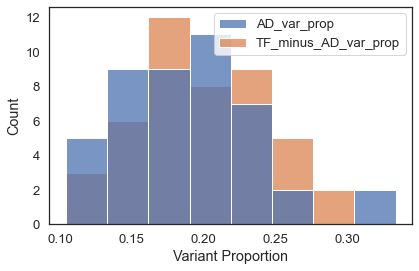

In [120]:
sns.histplot(var_prop_df[["AD_var_prop", "TF_minus_AD_var_prop"]])
plt.xlabel("Variant Proportion");

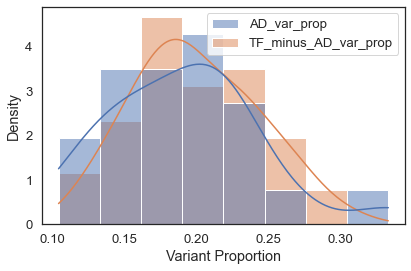

In [122]:
sns.histplot(var_prop_df[["AD_var_prop", "TF_minus_AD_var_prop"]], 
             stat = "density", kde = True)
plt.xlabel("Variant Proportion");